# Detecting barcodes in the wild ...

1. max-min normalize
2. bilateral filtering
3. thresholding
4. *large* median filtering (removing noise and merging close edges/bars)
5. contour detection
6. convex poly gen (rectangle generation)

In [122]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

(321, 589)


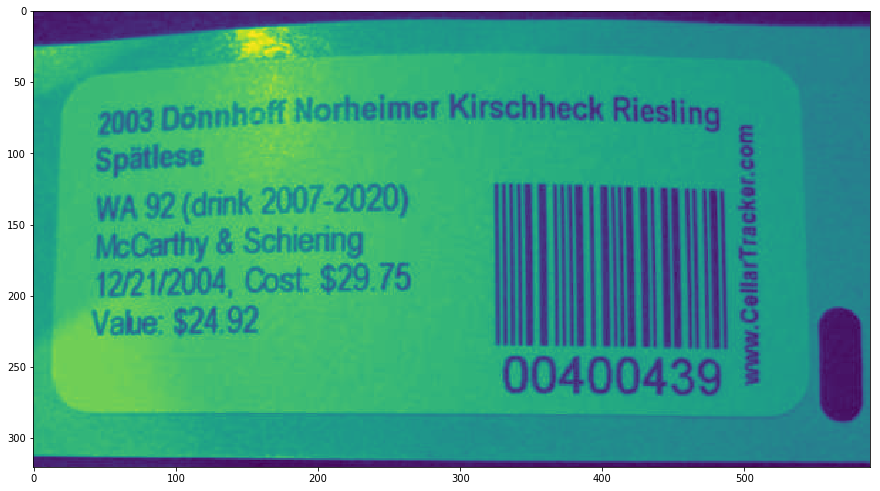

In [123]:
img = cv2.imread('/Users/tejaswin.p/Downloads/cellar_tracker_barcode_1.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32)
print img.shape

plt.figure(figsize=(15, 15))
plt.imshow(img);

In [37]:
scale = 255.0/(img.max() - img.min())
img = scale * img - img.min() * scale

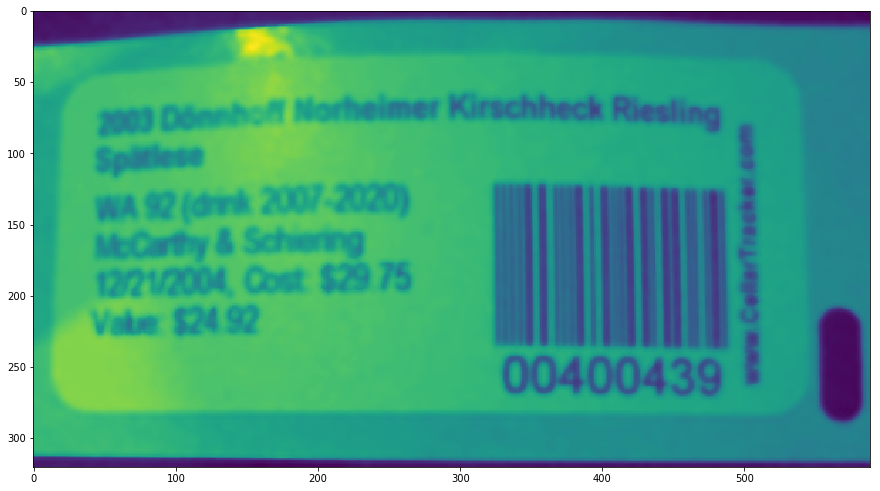

In [57]:
bf = cv2.bilateralFilter(img, 9, 75, 75)
# bf = cv2.GaussianBlur(img, (15, 15), 0)
plt.figure(figsize=(15, 15))
plt.imshow(bf);

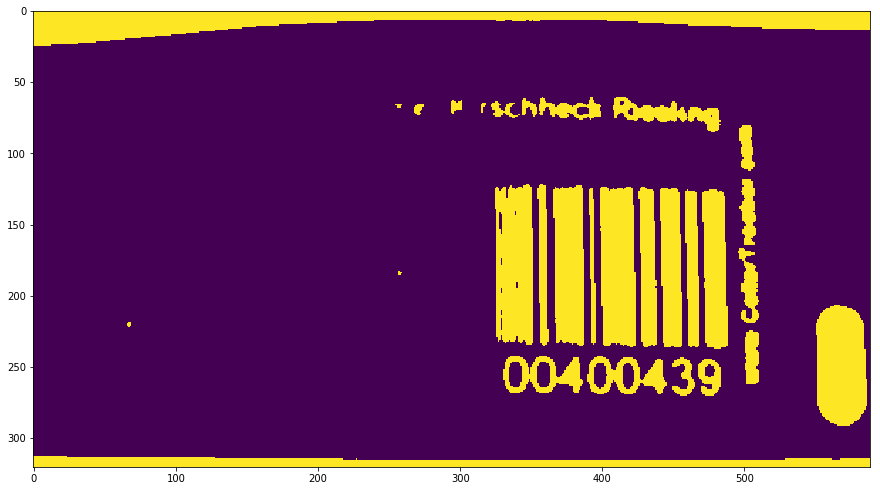

In [75]:
binary = np.zeros_like(bf)

binary[bf < 100] = 255
plt.figure(figsize=(15, 15))
plt.imshow(binary);

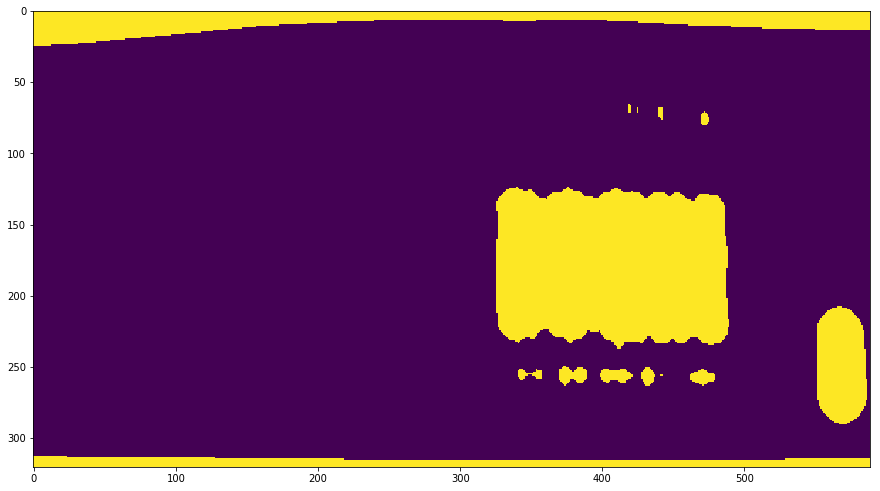

In [82]:
median = cv2.medianBlur(binary.astype(np.uint8), 21)

plt.figure(figsize=(15, 15))
plt.imshow(median);

In [105]:
_median, contours, hierarchy = cv2.findContours(median, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)

In [106]:
contours = sorted(contours, key=lambda x:cv2.contourArea(x), reverse=True)

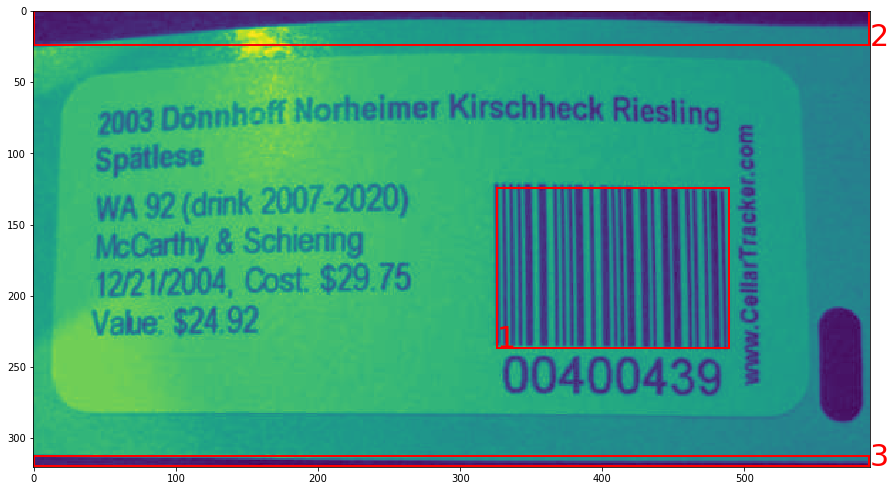

In [133]:
plt.figure(figsize=(15, 15))
plt.imshow(img)
ax = plt.gca()
for ix, cnt in enumerate(contours[:3]):
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    patch = patches.Polygon(box, closed=True, fill=False, color='red', linewidth=2)
    ax.add_patch(patch)
    plt.text(x=box[0][0], y=box[0][1], s=str(ix+1), size=30, color='red');

In [127]:
plt.text?

In [119]:
patches.Polygon?